In [1]:
import numpy as np
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams, colors

import pandas
print(pandas.__version__)


1.1.5


In [2]:
# customized settings
params = {  # 'backend': 'ps',
    'font.family': 'serif',
    'font.serif': 'Latin Modern Roman',
    'font.size': 10,
    'axes.labelsize': 'medium',
    'axes.titlesize': 'medium',
    'legend.fontsize': 'medium',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'savefig.dpi': 150,
    'text.usetex': True}
# tell matplotlib about your params
rcParams.update(params)

# set nice figure sizes
fig_width_pt = 245    # Get this from LaTeX using \showthe\columnwidth
golden_mean = (np.sqrt(5.) - 1.) / 2.  # Aesthetic ratio
ratio = golden_mean
inches_per_pt = 1. / 72.27  # Convert pt to inches
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width*ratio  # height in inches
fig_size = [2*fig_width, 2*fig_height]
rcParams.update({'figure.figsize': fig_size})

In [3]:
def extract_forecasts(data, forecast_period):
    
    dates = []
    dates_pivot = []
    data_quantile_0025_cont = []
    data_quantile_0975_cont = []
    data_point_cont = []
    
    for file in sorted(os.listdir(ensemble_forecast_directory))[7:]:    

        if file[-4:] == '.csv':
            
            data = pd.read_csv(ensemble_forecast_directory+file)
            
            data = data[data['location'] == 'US']
                
            data_quantile = data[data['type'] == 'quantile']
                        
            data_quantile_0025 = data[data['quantile'] == 0.025]    
            data_quantile_0975 = data[data['quantile'] == 0.975]     
            
            data_point = data[data['type'] == 'point']
            
            dates_pivot.append(data_point[data_point['target'] == forecast_period]['forecast_date'].to_numpy()[0])
            
            dates.append(data_quantile_0025[data_quantile_0025['target'] == forecast_period]['target_end_date'].to_numpy()[0])
            data_quantile_0025_cont.append(float(data_quantile_0025[data_quantile_0025['target'] == forecast_period]['value']))
            data_quantile_0975_cont.append(float(data_quantile_0975[data_quantile_0975['target'] == forecast_period]['value']))
            data_point_cont.append(float(data_point[data_point['target'] == forecast_period]['value']))
    
    dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
    dates_pivot = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates_pivot]
    
    return np.asarray(dates), np.asarray(dates_pivot), np.asarray(data_quantile_0025_cont), np.asarray(data_quantile_0975_cont), np.asarray(data_point_cont)

In [4]:
covid_data = pd.read_csv('../../data/time_series_covid19_deaths_US.csv')

print(covid_data.head())

colnames = covid_data.columns.tolist()

print(colnames)

        UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 5/21/21  5/22/21  5/23/21  5/24/21  5/25/21  \
0  32.539527 -86.644082  ...     109      110      110      110      110   
1  30.727750 -87.722071  ...     310      310      310      310      310   
2  31.868263 -85.387129  ...      58       58       58       58       58   
3  32.996421 -87.125115  ...      64       64       64       64       64   
4  33.982109 -86.567906  ...     139      139      139      139      139   

   5/26/21  5/27/21  5/28/21  5/29/21  5/30/21  
0      110      110

In [5]:
start = datetime.datetime.strptime(colnames[12], "%m/%d/%y")
print(start)
end = datetime.datetime.strptime(colnames[-1], "%m/%d/%y")
print(end)

dates_covid_data = np.asarray([start + datetime.timedelta(days=x) for x in range(0, (end-start).days)])

dates_covid_data = dates_covid_data[3:][::7]

2020-01-22 00:00:00
2021-05-30 00:00:00


In [6]:
deaths_covid_data = [covid_data.iloc[:,i].sum() for i in range(12,len(colnames))]
deaths_covid_data_dates = [colnames[i] for i in range(12,len(colnames))]
print(deaths_covid_data)
print(len(deaths_covid_data))
print(len(deaths_covid_data_dates))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 7, 8, 12, 13, 15, 18, 22, 23, 29, 34, 44, 52, 60, 72, 99, 137, 198, 271, 379, 481, 597, 789, 1032, 1365, 1784, 2306, 2948, 3572, 4285, 5370, 6653, 8165, 9596, 11159, 12774, 14545, 17120, 19280, 21483, 23677, 25804, 27678, 29687, 32122, 34734, 36877, 38987, 40960, 42931, 45161, 47675, 50135, 52591, 54779, 56490, 57889, 59397, 61621, 64039, 66235, 68144, 69875, 71065, 72445, 74687, 77001, 78930, 80693, 82161, 83139, 84181, 85780, 87507, 89303, 90971, 92169, 92990, 94217, 95673, 97174, 98359, 99576, 100666, 101305, 101897, 102574, 104037, 105138, 106271, 107225, 107840, 108616, 109597, 110607, 111620, 112511, 113153, 113612, 114119, 115032, 115908, 116738, 117567, 118302, 118647, 119043, 119857, 120596, 121285, 121914, 122473, 122790, 123197, 123945, 124682, 125219, 125848, 126351, 126669, 127054, 127607, 128311, 129024, 129694, 130009, 130335, 130711, 131873, 132698, 1

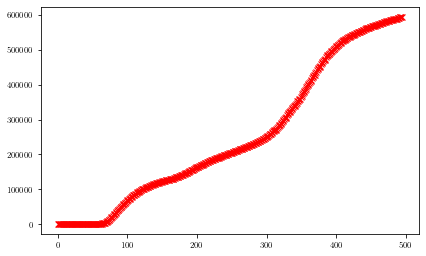

In [7]:
plt.plot(deaths_covid_data, 'rx')

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    1    0    5    1    4    1    2    3
    4    1    6    5   10    8    8   12   27   38   61   73  108  102
  116  192  243  333  419  522  642  624  713 1085 1283 1512 1431 1563
 1615 1771 2575 2160 2203 2194 2127 1874 2009 2435 2612 2143 2110 1973
 1971 2230 2514 2460 2456 2188 1711 1399 1508 2224 2418 2196 1909 1731
 1190 1380 2242 2314 1929 1763 1468  978 1042 1599 1727 1796 1668 1198
  821 1227 1456 1501 1185 1217 1090  639  592  677 1463 1101 1133  954
  615  776  981 1010 1013  891  642  459  507  913  876  830  829  735
  345  396  814  739  689  629  559  317  407  748  737  537  629  503
  318  385  553  704  713  670  315  326  376 1162  825 1020  817  728
  472  445  928  975  956  924  857  483  563 1091 1224 1070 1107  930
  531 1126 1330 1414 1231 1237 1093  437  581 1282 1438 1244 1237 1078
  524 

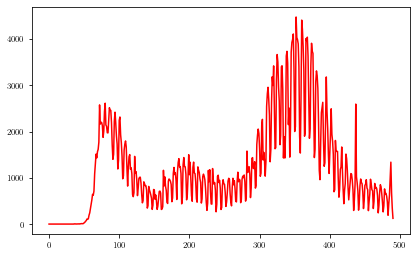

In [8]:
original_cum_signal = deaths_covid_data[3:]
deaths_covid_data = np.diff(deaths_covid_data[3:])

print(deaths_covid_data)
print(deaths_covid_data.shape)
plt.plot(deaths_covid_data,'r')

original_signal = deaths_covid_data
original_signal_dates = deaths_covid_data_dates[4:]

print(len(original_signal_dates))

In [9]:
df_diff_reg = pd.read_csv("denoised_derivatives.csv")
print(df_diff_reg)

        date     diff_reg
0    1/26/20    -0.000842
1    1/27/20     0.001269
2    1/28/20     0.000782
3    1/29/20    -0.001517
4    1/30/20    -0.000746
..       ...          ...
384  2/13/21  2129.453974
385  2/14/21  2011.295475
386  2/15/21  1896.369795
387  2/16/21  1775.499489
388  2/17/21  1651.951088

[389 rows x 2 columns]


[  0   7  14  21  28  35  42  49  56  63  70  77  84  91  98 105 112 119
 126 133 140 147 154 161 168 175 182 189 196 203 210 217 224 231 238 245
 252 259 266 273 280 287 294 301 308 315 322 329 336 343 350 357 364 371
 378 385 392 399 406 413 420 427 434 441 448 455 462 469 476 483 490]
[    0     0     0     0     1    16    42   421  2467  8211 14645 15156
 15530 13385 12286 10008  8497  6559  5928  5149  4171  3878  3658  5254
  5557  6468  7962  7297  7082  6778  6415  5860  5170  5511  5389  4882
  5089  5199  5849  5978  7238  7956 10875 10820 15752 17631 19189 16676
 18935 22601 23895 21972 22305 21324 17774 13244 14054 12286  8956  7311
  6904  5982  6896  5050  5012  4729  4655  4113  3819  4603   124]


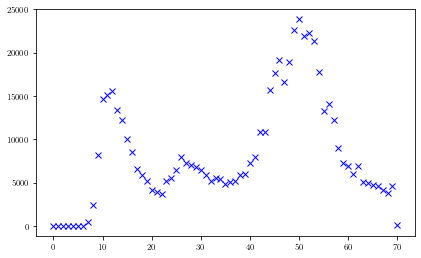

In [10]:
print(np.arange(0, len(deaths_covid_data), 7))
deaths_covid_data = np.add.reduceat(deaths_covid_data, np.arange(0, len(deaths_covid_data), 7))
print(deaths_covid_data)
plt.plot(deaths_covid_data, 'bx')

In [11]:
import pandas
print(pandas.__version__)

1.1.5


In [12]:
ensemble_forecast_directory = '../../data/COVIDhub-ensemble/'

dates_1wk, dates_forecast_1wk, data_quantile_0025_1wk, data_quantile_0975_1wk, data_point_1wk = \
extract_forecasts(ensemble_forecast_directory, '1 wk ahead inc death')

dates_2wk, dates_forecast_1wk, data_quantile_0025_2wk, data_quantile_0975_2wk, data_point_2wk = \
extract_forecasts(ensemble_forecast_directory, '2 wk ahead inc death')

dates_3wk, dates_forecast_1wk, data_quantile_0025_3wk, data_quantile_0975_3wk, data_point_3wk = \
extract_forecasts(ensemble_forecast_directory, '3 wk ahead inc death')

dates_4wk, dates_forecast_1wk, data_quantile_0025_4wk, data_quantile_0975_4wk, data_point_4wk = \
extract_forecasts(ensemble_forecast_directory, '4 wk ahead inc death')

In [13]:
print(dates_1wk[0], dates_forecast_1wk[0])

2020-06-13 00:00:00 2020-06-08 00:00:00


In [14]:
import pandas
print(pandas.__version__)

1.1.5


In [15]:
div = 1e3
def error_comparison(deaths_covid_data, data_point, dates, dates_covid_data, weeks):
    error_euler = []
    error_ensemble = []
    for i in range(len(dates)):
        ind = np.where(dates_covid_data == dates[i])
        if len(ind[0]):
            ind = ind[0][0]
            error_euler.append(abs(deaths_covid_data[ind-weeks]-deaths_covid_data[ind]))
            error_ensemble.append(abs(data_point[i]-deaths_covid_data[ind]))
      
    error_euler = np.asarray(error_euler)/div  
    error_ensemble = np.asarray(error_ensemble)/div    
    error_euler_cum = np.cumsum(error_euler)
    error_ensemble_cum = np.cumsum(error_ensemble)
    
    return error_euler, error_ensemble, error_euler_cum, error_ensemble_cum

In [16]:
print(deaths_covid_data.shape, dates_covid_data.shape)
print(data_point_1wk.shape, dates_1wk.shape)
#ensemble points have less points 

(71,) (71,)
(51,) (51,)


In [17]:
error_euler_1wk, error_ensemble_1wk, error_euler_1wk_cum, error_ensemble_1wk_cum = \
error_comparison(deaths_covid_data, data_point_1wk, dates_1wk, dates_covid_data, 1)

error_euler_2wk, error_ensemble_2wk, error_euler_2wk_cum, error_ensemble_2wk_cum = \
error_comparison(deaths_covid_data, data_point_2wk, dates_2wk, dates_covid_data, 2)

error_euler_3wk, error_ensemble_3wk, error_euler_3wk_cum, error_ensemble_3wk_cum = \
error_comparison(deaths_covid_data, data_point_3wk, dates_3wk, dates_covid_data, 3)

error_euler_4wk, error_ensemble_4wk, error_euler_4wk_cum, error_ensemble_4wk_cum = \
error_comparison(deaths_covid_data, data_point_4wk, dates_4wk, dates_covid_data, 4)

In [21]:
error_euler_1wk[:]

array([0.978, 0.293, 0.22 , 1.596, 0.303, 0.911, 1.494, 0.665, 0.215,
       0.304, 0.363, 0.555, 0.69 , 0.341, 0.122, 0.507, 0.207, 0.11 ,
       0.65 , 0.129, 1.26 , 0.718, 2.919, 0.055, 4.932, 1.879, 1.558,
       2.513, 2.259, 3.666, 1.294, 1.923, 0.333, 0.981, 3.55 , 4.53 ,
       0.81 , 1.768, 3.33 , 1.645, 0.407, 0.922, 0.914, 1.846, 0.038,
       0.283, 0.074, 0.542, 0.294, 0.784, 4.479])

ValueError: x and y must have same first dimension, but have shapes (49,) and (50,)

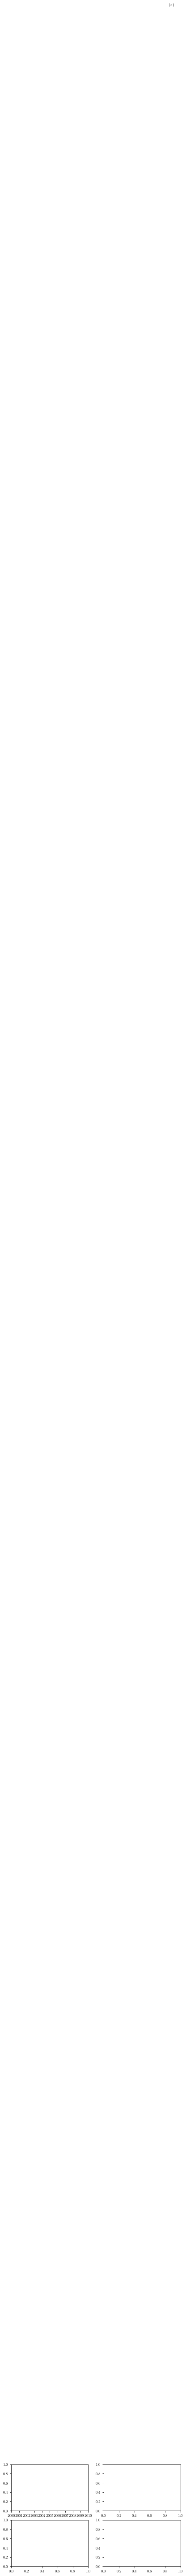

In [18]:
import warnings
warnings.simplefilter("ignore", UserWarning)
#import the_module_that_warns

fig, ax = plt.subplots(ncols = 2, nrows = 2)
                       #,figsize=(15,10))

#ax[0,0].set_title(r'1 week forecast')
ax[0,0].text(dates_1wk[0]-datetime.timedelta(days=7), 0.9*60, r'(a)')
ax[0,0].plot(dates_1wk[:-2],error_euler_1wk[:-1], color = 'tab:red', linewidth = 1.5) 
ax[0,0].plot(dates_1wk[:-2],error_euler_1wk_cum[:-1], color = 'tab:red', ls = (0, (5, 1)), linewidth = 1.5) 
ax[0,0].plot(dates_1wk[:-2],error_ensemble_1wk[:-1], color = 'tab:blue', linewidth = 1.5)  
ax[0,0].plot(dates_1wk[:-2],error_ensemble_1wk_cum[:-1], color = 'tab:blue', ls = (0, (5, 1)), linewidth = 1.5)  
ax[0,0].set_xlim([datetime.date(2020, 6, 1), datetime.date(2021, 3, 1)])
ax[0,0].set_xticks([])
ax[0,0].set_ylabel(r'Prediction error [$\times 10^3$]')
ax[0,0].set_ylim(0,60)

#ax[0,1].set_title(r'2 week forecast')
ax[0,1].text(dates_1wk[0]-datetime.timedelta(days=7), 0.9*60, r'(b)')
ax[0,1].plot(dates_2wk[:-3],error_euler_2wk[:-1], color = 'tab:red', linewidth = 1.5) 
ax[0,1].plot(dates_2wk[:-3],error_euler_2wk_cum[:-1], color = 'tab:red', ls = (0, (5, 1)), linewidth = 1.5) 
ax[0,1].plot(dates_2wk[:-3],error_ensemble_2wk[:-1], color = 'tab:blue', linewidth = 1.5)  
ax[0,1].plot(dates_2wk[:-3],error_ensemble_2wk_cum[:-1], color = 'tab:blue', ls = (0, (5, 1)), linewidth = 1.5)  
ax[0,1].set_xlim([datetime.date(2020, 6, 1), datetime.date(2021, 3, 1)])
ax[0,1].set_xticks([])
ax[0,1].set_ylim(0,60)
ax[0,1].set_yticks([])

#ax[1,0].set_title(r'3 week forecast')
ax[1,0].text(dates_1wk[0]-datetime.timedelta(days=7), 0.9*100, r'(c)')
ax[1,0].plot(dates_3wk[:-4],error_euler_3wk[:-1], color = 'tab:red', linewidth = 1.5) 
ax[1,0].plot(dates_3wk[:-4],error_euler_3wk_cum[:-1], color = 'tab:red', ls = (0, (5, 1)), linewidth = 1.5) 
ax[1,0].plot(dates_3wk[:-4],error_ensemble_3wk[:-1], color = 'tab:blue', linewidth = 1.5)  
ax[1,0].plot(dates_3wk[:-4],error_ensemble_3wk_cum[:-1], color = 'tab:blue', ls = (0, (5, 1)), linewidth = 1.5)  
ax[1,0].set_xlim([datetime.date(2020, 6, 1), datetime.date(2021, 3, 1)])
ax[1,0].tick_params(axis='x', labelrotation=45)
ax[1,0].set_ylabel(r'Prediction error [$\times 10^3$]')
ax[1,0].set_ylim(0,100)

#ax[1,1].set_title(r'4 week forecast')
ax[1,1].text(dates_1wk[0]-datetime.timedelta(days=7), 0.9*100, r'(d)')
ax[1,1].plot(dates_4wk[:-5],error_euler_4wk[:-1], color = 'tab:red', linewidth = 1.5) 
ax[1,1].plot(dates_4wk[:-5],error_euler_4wk_cum[:-1], color = 'tab:red', ls = (0, (5, 1)), linewidth = 1.5) 
ax[1,1].plot(dates_4wk[:-5],error_ensemble_4wk[:-1], color = 'tab:blue', linewidth = 1.5)  
ax[1,1].plot(dates_4wk[:-5],error_ensemble_4wk_cum[:-1], color = 'tab:blue', ls = (0, (5, 1)), linewidth = 1.5)  
ax[1,1].set_xlim([datetime.date(2020, 6, 1), datetime.date(2021, 3, 1)])
ax[1,1].tick_params(axis='x', labelrotation=45)
ax[1,1].set_ylim(0,100)
ax[1,1].set_yticks([])

plt.tight_layout()
plt.savefig('prediction_error.png', dpi = 480)

In [22]:
# independent check -- weekly derivative
def error_comparison_all_raw(covid_data_raw__, cdc_ensemble_forecast__, cdc_dates__, cdc_dates_pivot__, weeks):
    div = 1e3
    horizon = 6
    error_euler = []
    error_ensemble = []
    error_date = []
    for i in range(len(cdc_dates__)):
        date_tmp = cdc_dates__[i]
        date_pivot_tmp = cdc_dates_pivot__[i]
        print("prediction date", date_tmp.strftime("%-m/%-d/%y"))
        print("pivot date", date_pivot_tmp.strftime("%-m/%-d/%y"))
        ind = np.where(covid_data_raw__.columns == date_tmp.strftime("%-m/%-d/%y"))
        if len(ind[0]):
            error_date.append(date_tmp)
            ind = ind[0][0]
            
            print("ind", ind)
            print("cum number of dead on ind element on covid data", covid_data.iloc[:,ind].sum())
            current_week_slice = covid_data.iloc[:,ind-horizon+1:ind+1].sum()
            print("current week (prediction week)", current_week_slice)
            death_current = current_week_slice[-1]
            print("last element", death_current)
        
            historical_week_slice = covid_data.iloc[:,ind-horizon-horizon:ind-horizon].sum()#with mon-sat
            #historical_week_slice = covid_data.iloc[:,ind-horizon-horizon+1:ind-horizon+1].sum()#with tue-sun
            print("historical week",historical_week_slice)
       
            euler_pred = historical_week_slice[-1] - historical_week_slice[0]
            print("euler weekly derivative", euler_pred)
           
            current_week_death_diff = current_week_slice[-1]-current_week_slice[0]
            print("current week dead diff", current_week_death_diff)
            
            error_euler.append(abs(euler_pred-current_week_death_diff))
            error_ensemble.append(abs(cdc_ensemble_forecast__[i]-current_week_death_diff))
            
            print(f"cdc estimate {cdc_ensemble_forecast__[i]} for {cdc_dates__[i]} or {date_tmp}")
      
    error_euler = np.asarray(error_euler)/div  
    error_ensemble = np.asarray(error_ensemble)/div    
    error_euler_cum = np.cumsum(error_euler)
    error_ensemble_cum = np.cumsum(error_ensemble)
    error_date = np.asarray(error_date)
    
    return error_euler, error_ensemble, error_euler_cum, error_ensemble_cum, error_date

In [23]:
error_euler_1wk, error_ensemble_1wk, error_euler_1wk_cum, error_ensemble_1wk_cum, error_date = error_comparison_all_raw(covid_data, \
                                                                                           data_point_1wk, dates_1wk,dates_forecast_1wk, 1)

prediction date 6/13/20
pivot date 6/8/20
ind 155
cum number of dead on ind element on covid data 118302
current week (prediction week) 6/8/20     114119
6/9/20     115032
6/10/20    115908
6/11/20    116738
6/12/20    117567
6/13/20    118302
dtype: int64
last element 118302
historical week 6/1/20    108616
6/2/20    109597
6/3/20    110607
6/4/20    111620
6/5/20    112511
6/6/20    113153
dtype: int64
euler weekly derivative 4537
current week dead diff 4183
cdc estimate 5773.725831488972 for 2020-06-13 00:00:00 or 2020-06-13 00:00:00
prediction date 6/20/20
pivot date 6/15/20
ind 162
cum number of dead on ind element on covid data 122473
current week (prediction week) 6/15/20    119043
6/16/20    119857
6/17/20    120596
6/18/20    121285
6/19/20    121914
6/20/20    122473
dtype: int64
last element 122473
historical week 6/8/20     114119
6/9/20     115032
6/10/20    115908
6/11/20    116738
6/12/20    117567
6/13/20    118302
dtype: int64
euler weekly derivative 4183
current week 

In [24]:
'''
C1, C2, C3 .... Ct

(C2-C1)+(C3-C2)+....+(Ct-C_{t-1})

(-C1)+()+....+(Ct)
'''

'\nC1, C2, C3 .... Ct\n\n(C2-C1)+(C3-C2)+....+(Ct-C_{t-1})\n\n(-C1)+()+....+(Ct)\n'

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


cum cdc error:  74557.03936780324
cum euler error:  50937.0


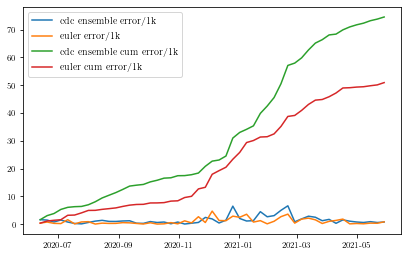

In [25]:
plt.plot(error_date, error_ensemble_1wk)
plt.plot(error_date, error_euler_1wk)

plt.plot(error_date, error_ensemble_1wk_cum)
plt.plot(error_date, error_euler_1wk_cum)

plt.legend(['cdc ensemble error/1k','euler error/1k','cdc ensemble cum error/1k','euler cum error/1k'])

plt.savefig('prediction_error_check.png', dpi = 600)

print("cum cdc error: ", error_ensemble_1wk_cum[-1]*1e3)
print("cum euler error: ", error_euler_1wk_cum[-1]*1e3)

In [26]:
# independent check -- daily derivative
def error_comparison_all_raw(covid_data_raw__, cdc_ensemble_forecast__, cdc_dates__, weeks):
    div = 1e3
    error_euler = []
    error_ensemble = []
    error_date = []
    for i in range(len(cdc_dates__)):
        date_tmp = cdc_dates__[i]
        print("prediction date", date_tmp.strftime("%-m/%-d/%y"))
        ind = np.where(covid_data_raw__.columns == date_tmp.strftime("%-m/%-d/%y"))
        if len(ind[0]):
            error_date.append(date_tmp)
            ind = ind[0][0]
            
            print("ind", ind)
            print("ind element on covid data", covid_data.iloc[:,ind].sum())
            current_week_slice = covid_data.iloc[:,ind-7+1:ind+1].sum()
            print("current week (prediction week)", current_week_slice)
            death_current = current_week_slice[-1]
            print("last element", death_current)
        
            historical_week_slice = covid_data.iloc[:,ind-7*weeks-7+1:ind-7*weeks+1].sum()
            print("historical week",historical_week_slice)
       
            euler_pred = 7*weeks*(historical_week_slice[-1]-historical_week_slice[-2])
            print("euler weekly derivative", euler_pred)
            print("euler daily deivative in historical week", historical_week_slice[-1]-historical_week_slice[-2])
            print("euler daily deivative*week in historical week", 7*weeks*(historical_week_slice[-1]-historical_week_slice[-2]))
            
            current_week_death_diff = current_week_slice[-1]-current_week_slice[0]
            print("current week dead diff", current_week_death_diff)
            
            error_euler.append(abs(euler_pred-current_week_death_diff))
            error_ensemble.append(abs(cdc_ensemble_forecast__[i]-current_week_death_diff))
            
            print(f"cdc estimate {cdc_ensemble_forecast__[i]} for {cdc_dates__[i]} or {date_tmp}")
      
    error_euler = np.asarray(error_euler)/div  
    error_ensemble = np.asarray(error_ensemble)/div    
    error_euler_cum = np.cumsum(error_euler)
    error_ensemble_cum = np.cumsum(error_ensemble)
    error_date = np.asarray(error_date)
    
    return error_euler, error_ensemble, error_euler_cum, error_ensemble_cum, error_date

In [27]:
error_euler_1wk, error_ensemble_1wk, error_euler_1wk_cum, error_ensemble_1wk_cum, error_date = error_comparison_all_raw(covid_data, data_point_1wk, dates_1wk, 1)

prediction date 6/13/20
ind 155
ind element on covid data 118302
current week (prediction week) 6/7/20     113612
6/8/20     114119
6/9/20     115032
6/10/20    115908
6/11/20    116738
6/12/20    117567
6/13/20    118302
dtype: int64
last element 118302
historical week 5/31/20    107840
6/1/20     108616
6/2/20     109597
6/3/20     110607
6/4/20     111620
6/5/20     112511
6/6/20     113153
dtype: int64
euler weekly derivative 4494
euler daily deivative in historical week 642
euler daily deivative*week in historical week 4494
current week dead diff 4690
cdc estimate 5773.725831488972 for 2020-06-13 00:00:00 or 2020-06-13 00:00:00
prediction date 6/20/20
ind 162
ind element on covid data 122473
current week (prediction week) 6/14/20    118647
6/15/20    119043
6/16/20    119857
6/17/20    120596
6/18/20    121285
6/19/20    121914
6/20/20    122473
dtype: int64
last element 122473
historical week 6/7/20     113612
6/8/20     114119
6/9/20     115032
6/10/20    115908
6/11/20    11673

cum cdc error:  52884.99826747558
cum euler error:  55928.00000000001


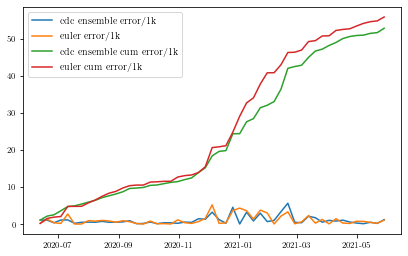

In [28]:
plt.plot(error_date, error_ensemble_1wk)
plt.plot(error_date, error_euler_1wk)

plt.plot(error_date, error_ensemble_1wk_cum)
plt.plot(error_date, error_euler_1wk_cum)

plt.legend(['cdc ensemble error/1k','euler error/1k','cdc ensemble cum error/1k','euler cum error/1k'])

plt.savefig('prediction_error_check_daily_derivatives.png', dpi = 600)

print("cum cdc error: ", error_ensemble_1wk_cum[-1]*1e3)
print("cum euler error: ", error_euler_1wk_cum[-1]*1e3)

In [29]:
#cumulative 

# independent check -- weekly derivative
def error_comparison_all_raw(covid_data_raw__, cdc_ensemble_forecast__, cdc_dates__, weeks):
    div = 1e3
    error_euler = []
    error_ensemble = []
    error_date = []
    for i in range(len(cdc_dates__)):
        date_tmp = cdc_dates__[i]
        print("prediction date", date_tmp.strftime("%-m/%-d/%y"))
        ind = np.where(covid_data_raw__.columns == date_tmp.strftime("%-m/%-d/%y"))
        if len(ind[0]):
            error_date.append(date_tmp)
            ind = ind[0][0]
            
            print("ind", ind)
            print("ind element on covid data", covid_data.iloc[:,ind].sum())
            current_week_slice = covid_data.iloc[:,ind-7+1:ind+1].sum()
            print("current week (prediction week)", current_week_slice)
            death_current = current_week_slice[-1]
            print("last element", death_current)
        
            historical_week_slice = covid_data.iloc[:,ind-7*weeks-7+1:ind-7*weeks+1].sum()
            print("historical week",historical_week_slice)
       
            weekly_derivative = historical_week_slice[-1] - historical_week_slice[0]
        
            #historical_week_prev_slice = covid_data.iloc[:,ind-7*3+1:ind-7*2+1+1].sum()
            #print("historical -2 weeks", historical_week_prev_slice)
            #weekly_derivative_last =  historical_week_prev_slice[-1] -  historical_week_prev_slice[0]
            #euler_pred = weekly_derivative + (weekly_derivative-weekly_derivative_last)
            #print("euler weekly derivatives", weekly_derivative, weekly_derivative_last)
            
            daily_derivative_curr = (historical_week_slice[-1]-historical_week_slice[-2])
            daily_derivative_last = (historical_week_slice[-2]-historical_week_slice[-3])
            print("daily derivatives last", daily_derivative_curr, daily_derivative_last)
            
            derivative_corr = (daily_derivative_curr-daily_derivative_last)
            euler_pred = weekly_derivative + derivative_corr
            print("euler pred, last weekly derivative, last daily second derivative", euler_pred, weekly_derivative, derivative_corr)
            
            current_week_death_diff = current_week_slice[-1]-current_week_slice[0]
            print("current week dead diff", current_week_death_diff)
            
            error_euler.append(abs(euler_pred-current_week_death_diff))
            error_ensemble.append(abs(cdc_ensemble_forecast__[i]-current_week_death_diff))
            
            print(f"cdc estimate {cdc_ensemble_forecast__[i]} for {cdc_dates__[i]} or {date_tmp}")
      
    error_euler = np.asarray(error_euler)/div  
    error_ensemble = np.asarray(error_ensemble)/div    
    error_euler_cum = np.cumsum(error_euler)
    error_ensemble_cum = np.cumsum(error_ensemble)
    error_date = np.asarray(error_date)
    
    return error_euler, error_ensemble, error_euler_cum, error_ensemble_cum, error_date

In [30]:
error_euler_1wk, error_ensemble_1wk, error_euler_1wk_cum, error_ensemble_1wk_cum, error_date = error_comparison_all_raw(covid_data, data_point_1wk, dates_1wk, 1)

prediction date 6/13/20
ind 155
ind element on covid data 118302
current week (prediction week) 6/7/20     113612
6/8/20     114119
6/9/20     115032
6/10/20    115908
6/11/20    116738
6/12/20    117567
6/13/20    118302
dtype: int64
last element 118302
historical week 5/31/20    107840
6/1/20     108616
6/2/20     109597
6/3/20     110607
6/4/20     111620
6/5/20     112511
6/6/20     113153
dtype: int64
daily derivatives last 642 891
euler pred, last weekly derivative, last daily second derivative 5064 5313 -249
current week dead diff 4690
cdc estimate 5773.725831488972 for 2020-06-13 00:00:00 or 2020-06-13 00:00:00
prediction date 6/20/20
ind 162
ind element on covid data 122473
current week (prediction week) 6/14/20    118647
6/15/20    119043
6/16/20    119857
6/17/20    120596
6/18/20    121285
6/19/20    121914
6/20/20    122473
dtype: int64
last element 122473
historical week 6/7/20     113612
6/8/20     114119
6/9/20     115032
6/10/20    115908
6/11/20    116738
6/12/20    1

ind element on covid data 585884
current week (prediction week) 5/9/21     582013
5/10/21    582414
5/11/21    583091
5/12/21    583942
5/13/21    584748
5/14/21    585407
5/15/21    585884
dtype: int64
last element 585884
historical week 5/2/21    577452
5/3/21    577944
5/4/21    578822
5/5/21    579603
5/6/21    580398
5/7/21    581154
5/8/21    581771
dtype: int64
daily derivatives last 617 756
euler pred, last weekly derivative, last daily second derivative 4180 4319 -139
current week dead diff 3871
cdc estimate 4357.0 for 2021-05-15 00:00:00 or 2021-05-15 00:00:00
prediction date 5/22/21
ind 498
ind element on covid data 589703
current week (prediction week) 5/16/21    586147
5/17/21    586540
5/18/21    587300
5/19/21    587955
5/20/21    588620
5/21/21    589223
5/22/21    589703
dtype: int64
last element 589703
historical week 5/9/21     582013
5/10/21    582414
5/11/21    583091
5/12/21    583942
5/13/21    584748
5/14/21    585407
5/15/21    585884
dtype: int64
daily derivat

cum cdc error:  52884.99826747558
cum euler error:  53858.0


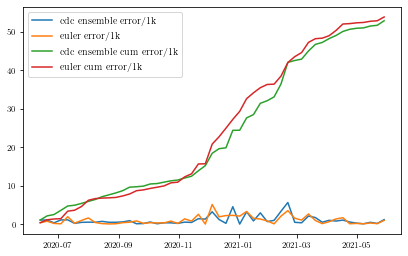

In [31]:
plt.plot(error_date, error_ensemble_1wk)
plt.plot(error_date, error_euler_1wk)

plt.plot(error_date, error_ensemble_1wk_cum)
plt.plot(error_date, error_euler_1wk_cum)

plt.legend(['cdc ensemble error/1k','euler error/1k','cdc ensemble cum error/1k','euler cum error/1k'])

plt.savefig('prediction_error_check_daily_derivatives.png', dpi = 600)

print("cum cdc error: ", error_ensemble_1wk_cum[-1]*1e3)
print("cum euler error: ", error_euler_1wk_cum[-1]*1e3)

In [ ]:
ind_reg = np.where(df_diff_reg['date']== "5/31/20")[0][0]

df_diff_reg.iloc[ind_reg]

In [32]:
#total variation .....
# independent check -- weekly derivative
def error_comparison_all_raw(covid_data_raw__, cdc_ensemble_forecast__, cdc_dates__, denoised_derivative_df__, weeks):
    div = 1e3
    error_euler = []
    error_ensemble = []
    error_date = []
    for i in range(len(cdc_dates__)):
        date_tmp = cdc_dates__[i]
        print("prediction date", date_tmp.strftime("%-m/%-d/%y"))
        ind = np.where(covid_data_raw__.columns == date_tmp.strftime("%-m/%-d/%y"))
        ind_reg = np.where(denoised_derivative_df__['date']==date_tmp.strftime("%-m/%-d/%y"))
        if len(ind[0]):
            error_date.append(date_tmp)
            ind = ind[0][0]
            
            ind_reg = ind_reg[0][0]
            print("ind reg", ind_reg, denoised_derivative_df__.iloc[ind_reg])
            print("denoised -7", ind_reg-7, denoised_derivative_df__.iloc[ind_reg-7])
            print("denoised -13", ind_reg-13, denoised_derivative_df__.iloc[ind_reg-13])
            
            daily_derivative_curr =  denoised_derivative_df__.iloc[ind_reg-7]['diff_reg']
            daily_derivative_last = denoised_derivative_df__.iloc[ind_reg-13]['diff_reg']
            print("daily derivatives last", daily_derivative_curr, daily_derivative_last)
            
            print("ind", ind)
            print("ind element on covid data", covid_data.iloc[:,ind].sum())
            current_week_slice = covid_data.iloc[:,ind-7+1:ind+1].sum()
            print("current week (prediction week)", current_week_slice)
            death_current = current_week_slice[-1]
            print("last element", death_current)
        
            historical_week_slice = covid_data.iloc[:,ind-7*weeks-7+1:ind-7*weeks+1].sum()
            print("historical week",historical_week_slice)
       
            weekly_derivative = historical_week_slice[-1] - historical_week_slice[0]
        
            #historical_week_prev_slice = covid_data.iloc[:,ind-7*3+1:ind-7*2+1+1].sum()
            #print("historical -2 weeks", historical_week_prev_slice)
            #weekly_derivative_last =  historical_week_prev_slice[-1] -  historical_week_prev_slice[0]
            #euler_pred = weekly_derivative + (weekly_derivative-weekly_derivative_last)
            #print("euler weekly derivatives", weekly_derivative, weekly_derivative_last)
            
            
            
            derivative_corr = (daily_derivative_curr-daily_derivative_last)
            euler_pred = weekly_derivative + derivative_corr
            print("euler pred, last weekly derivative, derivative corr", euler_pred, weekly_derivative, derivative_corr)
            
            current_week_death_diff = current_week_slice[-1]-current_week_slice[0]
            print("current week dead diff", current_week_death_diff)
            
            error_euler.append(abs(euler_pred-current_week_death_diff))
            error_ensemble.append(abs(cdc_ensemble_forecast__[i]-current_week_death_diff))
            
            print(f"cdc estimate {cdc_ensemble_forecast__[i]} for {cdc_dates__[i]} or {date_tmp}")
      
    error_euler = np.asarray(error_euler)/div  
    error_ensemble = np.asarray(error_ensemble)/div    
    error_euler_cum = np.cumsum(error_euler)
    error_ensemble_cum = np.cumsum(error_ensemble)
    error_date = np.asarray(error_date)
    
    return error_euler, error_ensemble, error_euler_cum, error_ensemble_cum, error_date

In [33]:
error_euler_1wk, error_ensemble_1wk, error_euler_1wk_cum, error_ensemble_1wk_cum, error_date = error_comparison_all_raw(covid_data, data_point_1wk, dates_1wk, df_diff_reg, 1)

prediction date 6/13/20
ind reg 139 date        6/13/20
diff_reg    670.186
Name: 139, dtype: object
denoised -7 132 date         6/6/20
diff_reg    793.625
Name: 132, dtype: object
denoised -13 126 date        5/31/20
diff_reg    922.158
Name: 126, dtype: object
daily derivatives last 793.6248413579158 922.1581256500364
ind 155
ind element on covid data 118302
current week (prediction week) 6/7/20     113612
6/8/20     114119
6/9/20     115032
6/10/20    115908
6/11/20    116738
6/12/20    117567
6/13/20    118302
dtype: int64
last element 118302
historical week 5/31/20    107840
6/1/20     108616
6/2/20     109597
6/3/20     110607
6/4/20     111620
6/5/20     112511
6/6/20     113153
dtype: int64
euler pred, last weekly derivative, derivative corr 5184.466715707879 5313 -128.53328429212058
current week dead diff 4690
cdc estimate 5773.725831488972 for 2020-06-13 00:00:00 or 2020-06-13 00:00:00
prediction date 6/20/20
ind reg 146 date        6/20/20
diff_reg     576.49
Name: 146, dty

historical week 12/6/20     285736
12/7/20     287342
12/8/20     289963
12/9/20     293146
12/10/20    296141
12/11/20    299559
12/12/20    302021
dtype: int64
euler pred, last weekly derivative, derivative corr 16515.52003846394 16285 230.52003846393836
current week dead diff 17561
cdc estimate 17340.0 for 2020-12-19 00:00:00 or 2020-12-19 00:00:00
prediction date 12/26/20
ind reg 335 date        12/26/20
diff_reg     2389.78
Name: 335, dtype: object
denoised -7 328 date        12/19/20
diff_reg     2674.73
Name: 328, dtype: object
denoised -13 322 date        12/13/20
diff_reg     2687.34
Name: 322, dtype: object
daily derivatives last 2674.733391433865 2687.341492400305
ind 351
ind element on covid data 337886
current week (prediction week) 12/20/20    322925
12/21/20    324845
12/22/20    328244
12/23/20    331665
12/24/20    334573
12/25/20    336001
12/26/20    337886
dtype: int64
last element 337886
historical week 12/13/20    303649
12/14/20    305301
12/15/20    308420
12/16

IndexError: index 0 is out of bounds for axis 0 with size 0

cum cdc error:  52884.99826747558
cum euler error:  53858.0


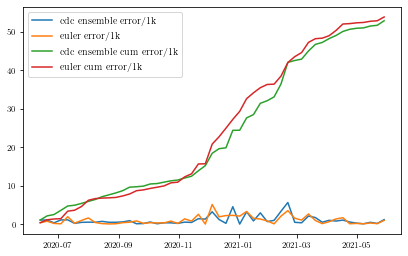

In [34]:
plt.plot(error_date, error_ensemble_1wk)
plt.plot(error_date, error_euler_1wk)

plt.plot(error_date, error_ensemble_1wk_cum)
plt.plot(error_date, error_euler_1wk_cum)

plt.legend(['cdc ensemble error/1k','euler error/1k','cdc ensemble cum error/1k','euler cum error/1k'])

plt.savefig('prediction_error_check_daily_derivatives.png', dpi = 600)

print("cum cdc error: ", error_ensemble_1wk_cum[-1]*1e3)
print("cum euler error: ", error_euler_1wk_cum[-1]*1e3)

In [57]:
#full causal -- total variation + euler
import pylops
def extract_min_total_variation_optimization(original_signal__):
    y = np.diff(original_signal__)
    nx = len(y)
    Iop = pylops.Identity(nx)
    D2op = pylops.SecondDerivative(nx, edge=True)
    lamda = 100e2

    xinv = pylops.optimization.leastsquares.RegularizedInversion(Iop, [D2op], y,
                                                          epsRs=[np.sqrt(lamda/2)],
                                                          **dict(iter_lim=30))
    
    return xinv
#total variation .....
# independent check -- weekly derivative
def error_comparison_all_raw(covid_data_raw__, cdc_ensemble_forecast__, cdc_dates__, weeks):
    div = 1e3
    error_euler = []
    error_ensemble = []
    error_date = []
    for i in range(len(cdc_dates__)):
        date_tmp = cdc_dates__[i]
        print("prediction date", date_tmp.strftime("%-m/%-d/%y"))
        ind = np.where(covid_data_raw__.columns == date_tmp.strftime("%-m/%-d/%y"))
        if len(ind[0]):
            error_date.append(date_tmp)
            ind = ind[0][0]
            
            print("ind", ind)
            print("ind element on covid data", covid_data.iloc[:,ind].sum())
            current_week_slice = covid_data.iloc[:,ind-7+1:ind+1].sum()
            print("current week (prediction week)", current_week_slice)
            death_current = current_week_slice[-1]
            print("last element", death_current)
        
            historical_week_slice = covid_data.iloc[:,ind-7*weeks-7+1+1:ind-7*weeks+1+1].sum()
            print("historical week",historical_week_slice)
            
            all_history_slice = covid_data.iloc[:,12:ind-7*weeks+1+1].sum()
            #print("all history slice",all_history_slice.to_numpy())
            xinv = extract_min_total_variation_optimization(all_history_slice.to_numpy())
            #print("total variation output:", xinv)
       
            weekly_derivative = historical_week_slice[-1] - historical_week_slice[0]  
            
            #derivative_corr = (daily_derivative_curr-daily_derivative_last) #noisy
            derivative_corr = (xinv[-1] - xinv[-7])
            #derivative_corr = 0 # HARD CODED
            euler_pred = weekly_derivative + derivative_corr
            print("euler pred, last weekly derivative, derivative corr", euler_pred, weekly_derivative, derivative_corr)
            
            
            current_week_death_diff = current_week_slice[-1]-current_week_slice[0]
            print("current week dead diff", current_week_death_diff)
            
            error_euler.append(abs(euler_pred-current_week_death_diff))
            error_ensemble.append(abs(cdc_ensemble_forecast__[i]-current_week_death_diff))
            
            print(f"cdc estimate {cdc_ensemble_forecast__[i]} for {cdc_dates__[i]} or {date_tmp}")
      
    error_euler = np.asarray(error_euler)/div  
    error_ensemble = np.asarray(error_ensemble)/div    
    error_euler_cum = np.cumsum(error_euler)
    error_ensemble_cum = np.cumsum(error_ensemble)
    error_date = np.asarray(error_date)
    
    return error_euler, error_ensemble, error_euler_cum, error_ensemble_cum, error_date

In [58]:
error_euler_1wk, error_ensemble_1wk, error_euler_1wk_cum, error_ensemble_1wk_cum, error_date = error_comparison_all_raw(covid_data, data_point_1wk, dates_1wk, 1)

prediction date 6/13/20
ind 155
ind element on covid data 118302
current week (prediction week) 6/7/20     113612
6/8/20     114119
6/9/20     115032
6/10/20    115908
6/11/20    116738
6/12/20    117567
6/13/20    118302
dtype: int64
last element 118302
historical week 6/1/20    108616
6/2/20    109597
6/3/20    110607
6/4/20    111620
6/5/20    112511
6/6/20    113153
6/7/20    113612
dtype: int64
euler pred, last weekly derivative, derivative corr 4786.658518741253 4996 -209.34148125874742
current week dead diff 4690
cdc estimate 5773.725831488972 for 2020-06-13 00:00:00 or 2020-06-13 00:00:00
prediction date 6/20/20
ind 162
ind element on covid data 122473
current week (prediction week) 6/14/20    118647
6/15/20    119043
6/16/20    119857
6/17/20    120596
6/18/20    121285
6/19/20    121914
6/20/20    122473
dtype: int64
last element 122473
historical week 6/8/20     114119
6/9/20     115032
6/10/20    115908
6/11/20    116738
6/12/20    117567
6/13/20    118302
6/14/20    118647

euler pred, last weekly derivative, derivative corr 4754.307999485447 4910 -155.6920005145529
current week dead diff 5124
cdc estimate 4961.0 for 2020-09-26 00:00:00 or 2020-09-26 00:00:00
prediction date 10/3/20
ind 267
ind element on covid data 209634
current week (prediction week) 9/27/20    205067
9/28/20    205425
9/29/20    206259
9/30/20    207217
10/1/20    208090
10/2/20    208950
10/3/20    209634
dtype: int64
last element 209634
historical week 9/21/20    200055
9/22/20    201087
9/23/20    202143
9/24/20    203040
9/25/20    203984
9/26/20    204752
9/27/20    205067
dtype: int64
euler pred, last weekly derivative, derivative corr 4940.237278860116 5012 -71.76272113988432
current week dead diff 4567
cdc estimate 5128.0 for 2020-10-03 00:00:00 or 2020-10-03 00:00:00
prediction date 10/10/20
ind 274
ind element on covid data 214723
current week (prediction week) 10/4/20     210015
10/5/20     210495
10/6/20     211181
10/7/20     212108
10/8/20     213097
10/9/20     214065
1

euler pred, last weekly derivative, derivative corr 13648.863428300503 14468 -819.1365716994965
current week dead diff 17508
cdc estimate 17533.0 for 2021-01-02 00:00:00 or 2021-01-02 00:00:00
prediction date 1/9/21
ind 365
ind element on covid data 379422
current week (prediction week) 1/3/21    358268
1/4/21    360362
1/5/21    364077
1/6/21    368004
1/7/21    371992
1/8/21    376100
1/9/21    379422
dtype: int64
last element 379422
historical week 12/28/20    341317
12/29/20    344950
12/30/20    348683
12/31/20    352163
1/1/21      354313
1/2/21      356821
1/3/21      358268
dtype: int64
euler pred, last weekly derivative, derivative corr 16820.534600554463 16951 -130.4653994455366
current week dead diff 21154
cdc estimate 17941.0 for 2021-01-09 00:00:00 or 2021-01-09 00:00:00
prediction date 1/16/21
ind 372
ind element on covid data 403317
current week (prediction week) 1/10/21    381422
1/11/21    383526
1/12/21    388001
1/13/21    392032
1/14/21    396020
1/15/21    399913
1

dtype: int64
euler pred, last weekly derivative, derivative corr 4391.050171163192 4466 -74.94982883680757
current week dead diff 4439
cdc estimate 4708.0 for 2021-05-01 00:00:00 or 2021-05-01 00:00:00
prediction date 5/8/21
ind 484
ind element on covid data 581771
current week (prediction week) 5/2/21    577452
5/3/21    577944
5/4/21    578822
5/5/21    579603
5/6/21    580398
5/7/21    581154
5/8/21    581771
dtype: int64
last element 581771
historical week 4/26/21    573167
4/27/21    573818
4/28/21    574787
4/29/21    575654
4/30/21    576397
5/1/21     577116
5/2/21     577452
dtype: int64
euler pred, last weekly derivative, derivative corr 4216.200223668648 4285 -68.7997763313524
current week dead diff 4319
cdc estimate 4418.0 for 2021-05-08 00:00:00 or 2021-05-08 00:00:00
prediction date 5/15/21
ind 491
ind element on covid data 585884
current week (prediction week) 5/9/21     582013
5/10/21    582414
5/11/21    583091
5/12/21    583942
5/13/21    584748
5/14/21    585407
5/15

cum cdc error:  52884.99826747558
cum euler error:  50521.303286911345


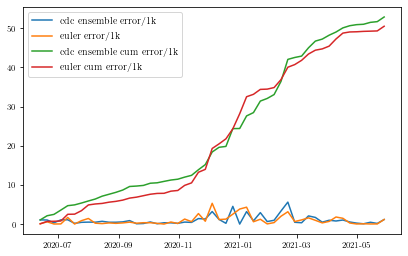

In [59]:
plt.plot(error_date, error_ensemble_1wk)
plt.plot(error_date, error_euler_1wk)

plt.plot(error_date, error_ensemble_1wk_cum)
plt.plot(error_date, error_euler_1wk_cum)

plt.legend(['cdc ensemble error/1k','euler error/1k','cdc ensemble cum error/1k','euler cum error/1k'])

plt.savefig('prediction_error_check_daily_derivatives.png', dpi = 600)

print("cum cdc error: ", error_ensemble_1wk_cum[-1]*1e3)
print("cum euler error: ", error_euler_1wk_cum[-1]*1e3)

In [ ]:
plt.plot(original_cum_signal)

In [ ]:
#https://pylops.readthedocs.io/en/latest/gallery/plot_tvreg.html?highlight=total%20variation
import pylops
y = original_cum_signal
nx = len(y)
print(nx)
Iop = pylops.Identity(nx)
D2op = pylops.SecondDerivative(nx, edge=True)
lamda = 1e2

xinv = \
    pylops.optimization.leastsquares.RegularizedInversion(Iop, [D2op], y,
                                                          epsRs=[np.sqrt(lamda/2)],
                                                          **dict(iter_lim=30))
denoised_signal = xinv
denoised_signal_dates = original_signal_dates
plt.figure(figsize=(10, 5))
plt.plot(y, '.k', label='observed data')
plt.plot(xinv, 'r', lw=2, label='xinv')
plt.legend()
plt.title('L2 inversion')
print(np.sum((xinv-y)**2))

In [ ]:
plt.plot(np.diff(xinv))

In [ ]:
[denoised_signal, denoised_signal]

In [ ]:
#df_denoised = pd.DataFrame([denoised_signal denoised_signal], columns = ['Name', 'Age'])

series = pd.Series(denoised_signal, index = denoised_signal_dates) 

series.to_csv("denoised_derivatives.csv")

In [ ]:
print(series)